# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [17]:
# Used for operations and manipulation of data
import pandas as pd
import numpy as np

# Used for visualization of data
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
df = pd.read_csv('data/human_body_temperature.csv')

# set formatting for figures
sns.set()

Before starting any analysis, I will look at the general structure and format of the data:

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [19]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [50]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


### 1. Is the distribution of body temperatures normal?

In [20]:
# define ECDF function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

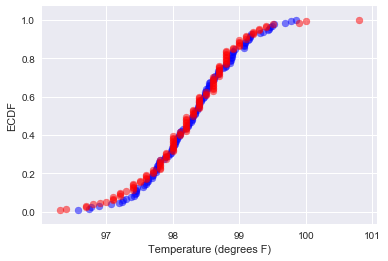

In [73]:
# set a random seed for code reproducibility
np.random.seed(1)

# Calculate mu and sigma for temperature data
mu = np.mean(df.temperature)
sigma = np.std(df.temperature)

# Calculate the corresponding normal distribution of the temperature data
normal_temp = np.random.normal(mu, sigma, size=len(df.temperature))

# Generate ecdf for both calculated and actual values
norm_x, norm_y = ecdf(normal_temp)
real_x, real_y = ecdf(df.temperature)

# Create plots to visualize distributions
plt.scatter(norm_x, norm_y, color='blue', alpha = 0.5)
plt.scatter(real_x, real_y, color='red', alpha = 0.5)

plt.xlabel('Temperature (degrees F)')
plt.ylabel('ECDF')

plt.show()

We can see from the figure above that the normal distribution ecdf and the ecdf for the actual data overlap quite well, so we can assume that our data has a distribution that is close to normal.

### 2. Is the sample size large? Are the observations independent?

In [26]:
# Check the corresponding confidence interval for our total sample size
conf_int95 = np.percentile(df.temperature, [2.5, 97.5])

# Display confidence interval and sample size
print('Sample Size: {0}'.format(df.temperature.shape[0]))
print('Sample Median: {0}'.format(np.median(df.temperature)))
print('95% Confidence interval: Between {0} and {1}'.format(conf_int95[0], conf_int95[1]))

Sample Size: 130
Sample Median: 98.3
95% Confidence interval: Between 96.7225 and 99.4775


Our sample size is greater than 30, which will allow us to use several statistical metrics. Our sample size is large enough to give us a 95% confidence interval spread of about 2.8 degrees.

In [42]:
# Check independence of entries
print('# of duplicated entries: {0}'.format(df.duplicated().sum()))
print('\nDuplicated Entries:\n', df[df.duplicated()])
print('\nDuplicate Entry 1:\n', df.loc[(df.temperature == 98.2) & (df.gender == 'F') & (df.heart_rate == 73.0)])
print('\nDuplicate Entry 2:\n', df.loc[(df.temperature == 98.8) & (df.gender == 'M') & (df.heart_rate == 78.0)])
print('\nDuplicate Entry 3:\n', df.loc[(df.temperature == 98.0) & (df.gender == 'M') & (df.heart_rate == 78.0)])

# of duplicated entries: 3

Duplicated Entries:
      temperature gender  heart_rate
75          98.8      M        78.0
87          98.0      M        78.0
127         98.2      F        73.0

Duplicate Entry 1:
      temperature gender  heart_rate
54          98.2      F        73.0
127         98.2      F        73.0

Duplicate Entry 2:
     temperature gender  heart_rate
7          98.8      M        78.0
75         98.8      M        78.0

Duplicate Entry 3:
     temperature gender  heart_rate
72         98.0      M        78.0
87         98.0      M        78.0


By looking at the independence of the entries, we can see that our data is sufficiently independent. With only three entries containing one instance of a duplicate each, this can be coincidental due to the small number of features rather than repeated entries by error.

### 3. Is the true population mean really 98.6 degrees F?

In [76]:
# Mean of the sample population
print('Mean Temperature of the Sample in this Dataset: {0:0.2f} degrees F'.format(np.mean(df.temperature)))
print('Standard Deviation of the Sample in this Dataset: {0:0.2f}'.format(np.std(df.temperature)))

# Compute Z-statistic
z_score = (98.6 - np.mean(df.temperature))/(np.std(df.temperature)/np.sqrt(df.shape[0]))
print('Zscore for population mean of 98.6 degrees F: {0:0.2f}'.format(z_score))

Mean Temperature of the Sample in this Dataset: 98.25 degrees F
Standard Deviation of the Sample in this Dataset: 0.73
Zscore for population mean of 98.6 degrees F: 5.48


Since our sample size is greater than 30, it is more appropriate to use a one-sample Z statistic test for this test. The approximated Z score of 5.48 translates to an extremely low probability that the population mean is actually 98.6 degrees. The t value yields a similarly small p value (<< 0.05) and so successfully rejects the null hypothesis that the actual population mean temperature is 98.6 degrees F.

### 4. Draw a small sample of size 10 and repeat both tests.

In [77]:
# Subset 10 random temperatures from our sample
np.random.seed(1)
subset_temps = np.random.choice(df.temperature, 10)

# Mean of the sample population
print('Mean Temperature of the Sample in this Dataset: {0:0.2f} degrees F'.format(np.mean(subset_temps)))
print('Standard Deviation of the Sample in this Dataset: {0:0.2f}'.format(np.std(subset_temps)))

# Compute Z-statistic
t_score = (98.6 - np.mean(subset_temps))/(np.std(subset_temps)/np.sqrt(df.shape[0]))
print('t-score for population mean of 98.6 degrees F: {0:0.2f}'.format(t_score))

Mean Temperature of the Sample in this Dataset: 98.27 degrees F
Standard Deviation of the Sample in this Dataset: 0.42
t-score for population mean of 98.6 degrees F: 9.02


Since the subset sample size is now much less than 30, the z score is no longer suitable for the test. The p value can be approximated by the t statistic in this situation, although the high t score value for a sample size of 10 still suggests a p value beyond the threshold needed to reject the null hypothesis that the population mean temperature is actually 98.6 degrees. The probability from the z score, although not a valid approximation for this case, also successfully rejects the null hypothesis.

### 5. At what temperature should we consider someone's temperature to be abnormal?

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64


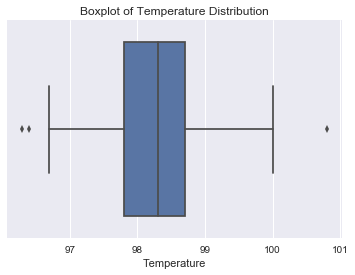


Range of temperatures considered normal for this dataset: Between 96.45 and 100.05 degrees F


In [86]:
# Display quartiles for temperature data
print(df.temperature.describe())

# Draw a box plot to visualize outlier temperature values
sns.boxplot(df.temperature)

plt.title('Boxplot of Temperature Distribution')
plt.xlabel('Temperature')

plt.show()

# Set a condition to identify outliers in the data
temp_quartile_values = np.percentile(df.temperature, [25, 75])
IQR = np.percentile(df.temperature, 75) - np.percentile(df.temperature, 25)
lowT_limit = temp_quartile_values[0] - 1.5*IQR
highT_limit = temp_quartile_values[1] + 1.5*IQR
print('\nRange of temperatures considered normal for this dataset: Between {0:0.2f} and {1:0.2f} degrees F'.format(lowT_limit,
                                                                                                          highT_limit))

We can consider a person's temperature to be abnormal if it would occur as an outlier in our dataset. The calculations above show that a person's temperature is abnormal if it is outside of the range between 96.45 and 100.05 degrees F.

### 6. Is there a significant difference in temperatures between males and females in normal temperature?

Summary Statistics for Male Temperature Data
 count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

Summary Statistics for Female Temperature Data
 count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64


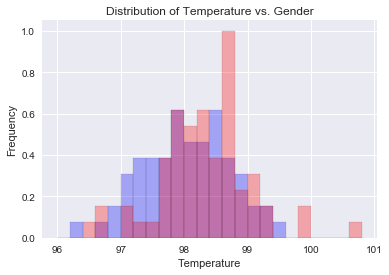

In [110]:
# Split the data into male and females
male_temps = df.loc[df.gender == 'M', 'temperature']
female_temps = df.loc[df.gender == 'F', 'temperature']

# Display summary statistics for each gender
print('Summary Statistics for Male Temperature Data\n', male_temps.describe())
print('\nSummary Statistics for Female Temperature Data\n', female_temps.describe())

# Display a plot of both male and female temperature distributions
bins = np.arange(96,101, 0.2)
plt.hist(male_temps, normed=True, color='b', bins=bins, edgecolor='k', alpha=0.3)
plt.hist(female_temps, normed=True, color='r', bins=bins, edgecolor='k', alpha=0.3)

plt.title('Distribution of Temperature vs. Gender')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

We can see from the statistics above that females tend to have a higher mean temperature than men by about 0.3 degrees F. The distributions for each remain fairly normal, though the distribution for females is shifted upwards. There is also a slightly larger variance in the temperatures recorded for females than for males.